In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\akhil\OneDrive\Desktop\Natural-Language-Processing-with-Python-master\TextFiles\smsspamcollection.tsv",sep="\t")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [2]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [3]:
len(df)

5572

In [4]:
 df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

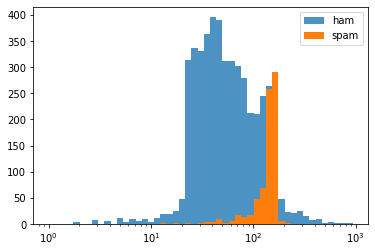

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins)#,aplha=0.8)
plt.legend(('ham','spam'))
plt.show()
#spam are large messages when compared to ham

In [7]:
from sklearn.model_selection import train_test_split
X = df[['length','punct']]
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,length,punct
708,49,6
4338,29,0
5029,67,1
4921,48,2
2592,44,3
...,...,...
3772,81,3
5191,22,2
5226,45,8
5390,26,0


In [8]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(solver='lbfgs')
lr_model.fit(X_train,y_train)

LogisticRegression()

In [9]:
from sklearn import metrics
pred = lr_model.predict(X_test)
print(metrics.confusion_matrix(y_test,pred))


[[1404   44]
 [ 219    5]]


In [10]:
df1 = pd.DataFrame(metrics.confusion_matrix(y_test,pred),index=['ham','spam'],columns=['ham','spam'])
df1

,ham,spam
ham,1404,44
spam,219,5


In [11]:
print(metrics.classification_report(y_test,pred))
print(metrics.accuracy_score(y_test,pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672

0.8427033492822966


In [12]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
pred1 = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test,pred1))
print(metrics.classification_report(y_test,pred1))
print(metrics.accuracy_score(y_test,pred1))

[[1438   10]
 [ 224    0]]
              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672

0.8600478468899522


In [13]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(X_train,y_train)
pred2 = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_test,pred2))
print(metrics.classification_report(y_test,pred2))
print(metrics.accuracy_score(y_test,pred2))

[[1373   75]
 [ 121  103]]
              precision    recall  f1-score   support

         ham       0.92      0.95      0.93      1448
        spam       0.58      0.46      0.51       224

    accuracy                           0.88      1672
   macro avg       0.75      0.70      0.72      1672
weighted avg       0.87      0.88      0.88      1672

0.8827751196172249
